In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
step_number = 1000
H_abun = 0.63
He_abun = 0.35
metal_abun = 0.02
gaunt_bf = 1.0005
gaunt_ff = 1.91  
guillotine = 9.99
X_H = 0.64
X_cno = 0.015
M_r0 = 0.0
L_r0 = 0.0
T_0 = 1.57E7
P_0 = 2.30E16
m_h = 1.6727E-27
k_b = 1.381E-23
G = 6.67408E-11
r_sun = 6.957E8
m_sun = 2.0E30
l_sun = 3.846E26
a = 7.6565E-16
c = 2.998E8
e0_pp = 1.08E-12
e0_cno = 8.24E-31
u = 1.0/((2.0*H_abun)+((3.0/4.0)*He_abun)+((1.0/2.0)*metal_abun))

In [3]:
def rho(y):
    Mr, Lr, T, P = y
    rho1 = (P-(a*(T**4.0)/3.0))*((u*m_h)/(k_b*T))
    return rho1

def eps(y):
    Mr, Lr, T, P = y
    rho0 = rho(y)                                           
    epp = e0_pp*rho0*(X_H**2.0)*(T/10E5)**4.0 
    ecno = e0_cno*rho0*X_H*X_cno*((T/10E5)**19.9)      
    eps1 = epp + ecno  
    return eps1 

def kappa(y):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    k_bf = 4.3E21*(gaunt_bf/guillotine)*metal_abun*(1.0+H_abun)*(rho0/T**3.5) 
    k_ff = 3.7E18*gaunt_ff*(1.0-metal_abun)*(1.0+H_abun)*(rho0/T**3.5)    
    k_e = 0.02*(1.0+H_abun)                                       
    kappa1 = ((k_bf+k_ff+k_e)/3.0)
    return kappa1

def dmdr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dmdr1 = 4.0*np.pi*(r**2.0)*rho0
    return dmdr1

def dpdr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    dpdr1 = -G*Mr*rho0/(r**2.0)
    return dpdr1

def dldr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    eps0 = eps(y)
    dldr1 = 4.0*np.pi*(r**2.0)*rho0*eps0
    return dldr1

def dtdr(y, r):
    Mr, Lr, T, P = y
    rho0 = rho(y)
    kappa0 = kappa(y)
    dtdr1 = -(3.0/(4.0*a*c))*(kappa0*rho0/(T**3.0))*(Lr/(4.0*np.pi*(r**2.0)))
    return dtdr1

def main(y, r):
    Mr, Lr, T, P = y
    dr_system = [dmdr(y,r),dldr(y,r),dtdr(y,r),dpdr(y,r)]
    return dr_system

y0 = [M_r0, L_r0, T_0, P_0] 
r = np.linspace(0.1, r_sun, step_number)
result = odeint(main, y0, r)

rho_results = [[rho(result[y]) for x in range(1)] for y in range(step_number)]
rho_array = np.array(rho_results)
array_r = np.array(r)
dLdr_results = [[dldr(result[y],array_r[y]) for x in range(1)] for y in range(step_number)]
dLdr_array = np.array(dLdr_results)

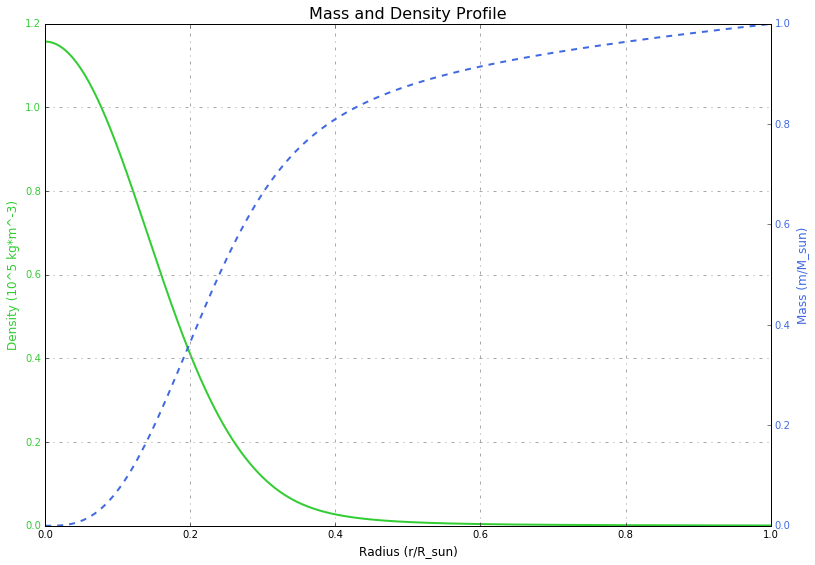

In [4]:
fig, ax1 = plt.subplots(figsize=(13,9))
ax1.grid(color='#A9A9A9', linestyle='-.', linewidth=1)
plt.title('Mass and Density Profile',fontsize=16)
ax1.plot(r/r_sun, rho_array/10E4, '#32CD32', label='Density', lw=2)
ax1.set_xlabel('Radius (r/R_sun)',fontsize=12)

ax1.set_ylabel('Density (10^5 kg*m^-3)', fontsize=12, color='#32CD32')
for tl in ax1.get_yticklabels():
    tl.set_color('#32CD32')


ax2 = ax1.twinx()
ax2.plot(r/r_sun, result[:, 0]/m_sun, '#4169E1', label='Mass', lw=2, linestyle='--')
ax2.set_ylabel('Mass (m/M_sun)', fontsize=12, color='#4169E1')
for tl in ax2.get_yticklabels():
    tl.set_color('#4169E1')


plt.show()

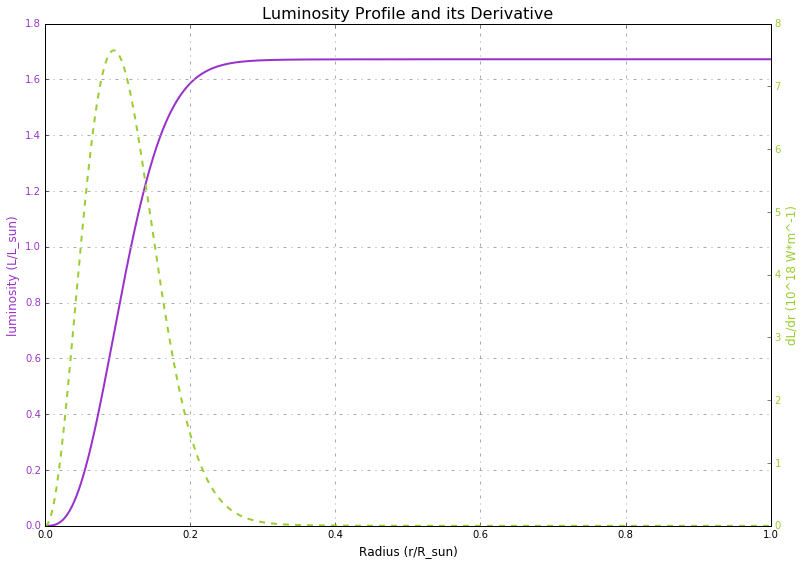

In [5]:
fig, ax1 = plt.subplots(figsize=(13,9))
ax1.grid(color='#A9A9A9', linestyle='-.', linewidth=1)
plt.title('Luminosity Profile and its Derivative',fontsize=16)
ax1.plot(r/r_sun, result[:, 1]/l_sun, '#9932CC', label='Luminosity', lw=2)
ax1.set_xlabel('Radius (r/R_sun)',fontsize=12)
ax1.set_ylabel('luminosity (L/L_sun)', fontsize=12, color='#9932CC')
for tl in ax1.get_yticklabels():
    tl.set_color('#9932CC')

ax2 = ax1.twinx()
ax2.plot(r/r_sun, dLdr_array/10E17, '#9ACD32', label='Mass', lw=2, linestyle='--')
ax2.set_ylabel('dL/dr (10^18 W*m^-1)', fontsize=12, color='#9ACD32')
for tl in ax2.get_yticklabels():
    tl.set_color('#9ACD32')
    

plt.show()

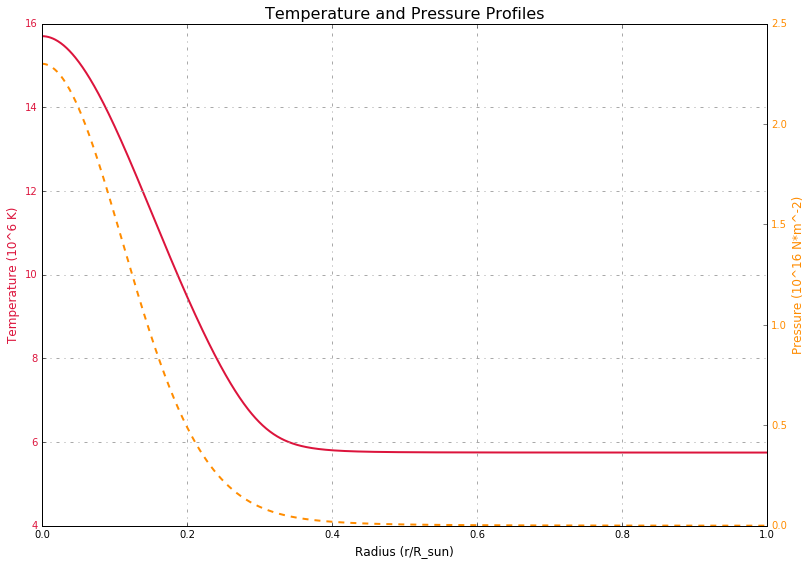

In [6]:
fig, ax1 = plt.subplots(figsize=(13,9))
ax1.grid(color='#A9A9A9', linestyle='-.', linewidth=1)
plt.title('Temperature and Pressure Profiles',fontsize=16)
ax1.plot(r/r_sun, result[:, 2]/10E5, '#DC143C', label='Temperature', lw=2)
ax1.set_xlabel('Radius (r/R_sun)',fontsize=12)
ax1.set_ylabel('Temperature (10^6 K)', fontsize=12, color='#DC143C')
for tl in ax1.get_yticklabels():
    tl.set_color('#DC143C')

ax2 = ax1.twinx()
ax2.plot(r/r_sun, result[:, 3]/10E15, '#FF8C00', label='Pressure', lw=2, linestyle='--')
ax2.set_ylabel('Pressure (10^16 N*m^-2)', fontsize=12, color='#FF8C00')
for tl in ax2.get_yticklabels():
    tl.set_color('#FF8C00')

    
plt.show()